# EmotionAnalysisStudy

Emotion detection or recognition from text is been an relevant research area in Natural
Language Processing (NLP) that can reveal valuable information to be used for various purposes. In today's world, written content have taken many forms in social media posts, news articles, blogs, customer review, etc., and the
content of these texts can be a useful resource for text mining to discover and study various aspects,
including sentiments and emotions. There have been many works that have achieved reasonable
results in the field of emotion recognition from text. My developing interest to NLP has lead me to choose this topic "Emotion detection". I have driven inspiration and help from various resouces available online that includes the Emotion detection-related research articles, studies and work.

This project work is an end-to-end simple Emotion Analysis Study that includes Text processing, Visualization of dataset, Sentiment analysis, Comparison of Vectorizers, Baseline comparison of different Machine learning models, and an LSTM model. It has been really a good learning experience for me, especially resolving glitches that took me a step deeper than my beginner state.

Also to mention, I had to change my plans many times during the course of the project due to memory outof bound issue which I would say is the main reason for this final outcome of my project

#### Index
+ About Dataset
+ Importing and analyzing dataset
+ Text Preprocessing
    + Text basic cleaning
    + Tokenize
    + Remove stopwords
    + Lemmatize
+ Data Visualization
    + Emotion specific popular keyword barplots
    + Emotion Wordcloud
+ Sentiment Analysis
    + Emotion vs Sentiment plot
    + Emotion vs Sentiment Donut plot
+ Feature Engineering
    + Compare: CountVectorizer vs TfidVectorizer vs HashingVectorizer
+ Classical Machine Learning Model Training
    + Models:
        + Logistic Regression
        + Naive Bayes
        + Random Forest
        + Passive Agressive Classifier
        + K-Nearest Neighbour
        + Support Vector Classifier
    + ML Model Comparison
    + Making a prediction
    + Model Interpretation
+ Long Short-Term Memory Model

### About Dataset

Spent a sometime in reseaching dataset, could collect few datasets from reources like Kaggle and github, referred sites like ISEAR. The different datasets were following different Emotional category set.

So next step was to decide on the emotion categories to be included. After some thought process and researching emotion categories on net and based on collected datasets, decided to go ahead with 7 emotion classes or labels, which are:
+ Emotion Labels:
    - JOY
    - ANGER
    - FEAR
    - SADNESS
    - LOVE
    - SURPRISE
    - And NEUTRAL

Next used MS excel to merge data from different dataset, and came up with final dataset - "emotion_set.csv"

The final set includes data from ISEAR, tweets, and other type as in data sources. Final size is within 50000 rows.

### Importing and analyzing dataset

In [ ]:
#Exporting essential packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('emotion_set.csv')

In [ ]:
df.head()

,text,emotion
0,i feel cold,anger
1,i feel the cold i can say he sends it,anger
2,i remember feeling like my blood had run cold ...,anger
3,i hate too is stepping outside in the cold and...,anger
4,i don't think i am anti social i just don't re...,anger


In [ ]:
df.shape

(39329, 2)

Checking for any missing value

In [ ]:
df.isna().sum()

text       0
emotion    0
dtype: int64

In [ ]:
df['emotion'].unique()

array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

Looking at counts of emotion label types

In [ ]:
df['emotion'].value_counts()

joy         6465
anger       6416
fear        5785
sadness     5720
love        5582
surprise    5000
neutral     4361
Name: emotion, dtype: int64

#### Creating some plots to have better view of the dataset

First one is a simple matplotlib bar plot

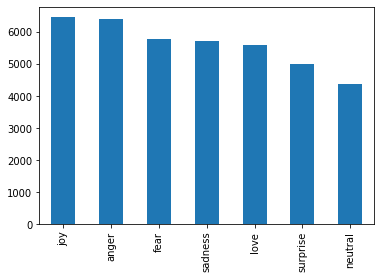

In [ ]:
df['emotion'].value_counts().plot(kind='bar')
plt.show()

Seaborn count plot gives nicer view

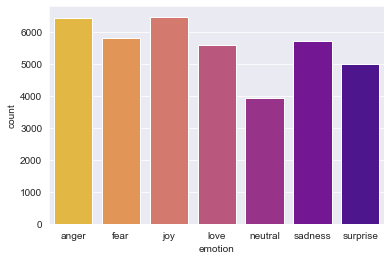

In [ ]:
sns.countplot(x='emotion', data=df, palette=("plasma_r"))
plt.show()

Here is another Donut view of the emotion distribution in our dataset.

A Donut chart is essentially a Pie Chart with an area of the center cut out. It is more concerned about the use of area of arcs to represent the information in the most effective manner

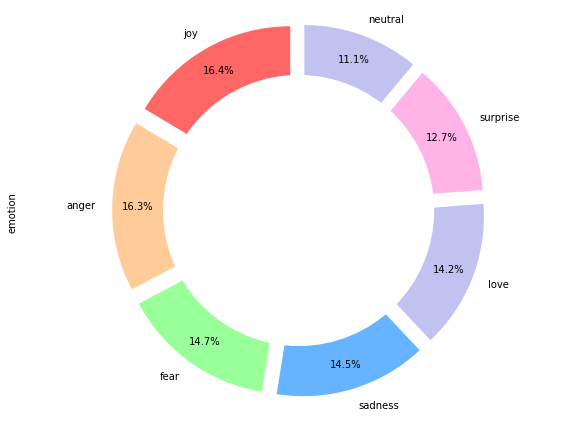

In [ ]:
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6', '#c2c2f0']
df['emotion'].value_counts().plot.pie(figsize=(8, 6),colors=colors,autopct='%0.1f%%',
                                      explode=[0.1,0.1,0.1,0.1,0.1, 0.1, 0.1], startangle=90, pctdistance=0.85)
##center circle
centre_circle = plt.Circle((0,0),0.8,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.axis('equal')
plt.title=("%Emotion distrubution in the dataset")
plt.show()

Above plots gives us a good overview of distribution of dataset

### Test preprocessing
+ Defining below a function to clean/preprocessing the text, to:
 - remove urls
 - remove numbers, punctuations, other characters
 - convert text case to lower case
 - tokenize words
 - remove stopwords
 - lemmatize words


In [ ]:
#import all text preprocessing related packages
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import neattext.functions as nfx

stopwords= set(stopwords.words('english'))

#Instantiate Lemmatizer
lemma = WordNetLemmatizer()

#Using here neattext library to remove 'userhandles'


def text_preprocess(text):
    clean_text = re.sub(r'http\S+', '', str(text))                            #removing the urls
    clean_text = nfx.remove_userhandles(clean_text)                           #remove 'userhandles'
    clean_text = re.sub('[^a-zA-Z]', ' ', str(clean_text))                    #removing numbers and punctuation
    clean_text = clean_text.lower()                                           #converting text to lower case
    clean_text = re.sub(r'feeling', '', clean_text)
    clean_text = re.sub(r'feel', '',clean_text)
    clean_text = word_tokenize(clean_text)                                    #tokenize words
    clean_text = [word for word in clean_text if word not in stopwords]       #removing stopwords
    clean_text = [lemma.lemmatize(word) for word in clean_text]               #lemmatize
    clean_text = ' '.join(clean_text)                                         #converting list to string

    return clean_text


Had played around with data and noticed that the words 'feel' and 'feeling' were common to all emotion type, hence include removal of those in above function


#### Applying text preprocess function on dataset 'text' colunm

In [ ]:
df['Clean_Text']=df['text'].apply(text_preprocess)

In [ ]:
df.head(20)

,text,emotion,Clean_Text
0,i feel cold,anger,cold
1,i feel the cold i can say he sends it,anger,cold say sends
2,i remember feeling like my blood had run cold ...,anger,remember like blood run cold actually dropped ...
3,i hate too is stepping outside in the cold and...,anger,hate stepping outside cold cold hug leg crawl ...
4,i don't think i am anti social i just don't re...,anger,think anti social really like going cold weath...
5,i feel like i'm getting a cold so i'm definite...,anger,like getting cold definitely glad got time res...
6,i could feel his cold body against mine it mad...,anger,could cold body mine made motionless
7,i feel is cold,anger,cold
8,i mean you all already know how i feel about m...,anger,mean already know brrrrr ing like cold winter ...
9,i feel the cold intensely as i cross the lake ...,anger,cold intensely cross lake slowly first time


#### Dropping empty text rows

In [ ]:
import numpy as np
df['Clean_Text'].replace('', np.nan, inplace=True)
df.dropna(subset=['Clean_Text'], inplace=True)

In [ ]:
df.shape

(38883, 3)

In [ ]:
df.dtypes

text          object
emotion       object
Clean_Text    object
dtype: object

### Data Visualization

In [ ]:
from collections import Counter
def extract_keywords(text, num=30):
    tokens = [token for token in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [ ]:
emotion_list = df.emotion.unique().tolist()

In [ ]:
emotion_list

['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise']

In [ ]:
## Code reference: https://www.youtube.com/watch?v=t1TkAcSDsI8
joy_docx = ' '.join(df[df['emotion'] == 'joy']['Clean_Text'])
keyword_joy = extract_keywords(joy_docx)
anger_docx = ' '.join(df[df['emotion'] == 'anger']['Clean_Text'])
keyword_anger = extract_keywords(anger_docx)
fear_docx = ' '.join(df[df['emotion'] == 'fear']['Clean_Text'])
keyword_fear = extract_keywords(fear_docx)
love_docx = ' '.join(df[df['emotion'] == 'love']['Clean_Text'])
keyword_love = extract_keywords(love_docx)
sad_docx = ' '.join(df[df['emotion'] == 'sadness']['Clean_Text'])
keyword_sad = extract_keywords(sad_docx)
surprise_docx = ' '.join(df[df['emotion'] == 'surprise']['Clean_Text'])
keyword_surprise = extract_keywords(surprise_docx)

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [ ]:
#Defining a plot function
## Code reference: https://www.youtube.com/watch?v=t1TkAcSDsI8
def plot_most_common_words(mydict, title):
    df_01=pd.DataFrame(mydict.items(), columns=['token', 'count'])
    plt.figure(figsize=(12,8))
    sns.barplot(x='token', y='count', data = df_01)
    plt.title(f"{title} plot - popular keywords")
    plt.xticks(rotation=45)
    plt.show()

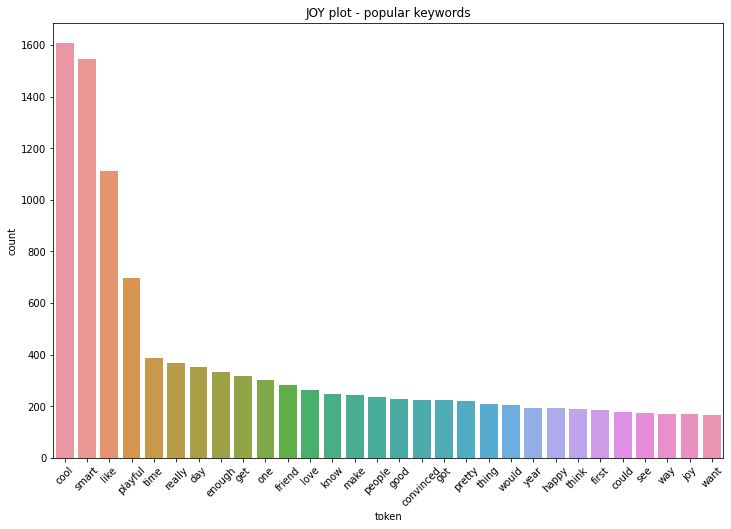

In [ ]:
plot_most_common_words(keyword_joy, "JOY")

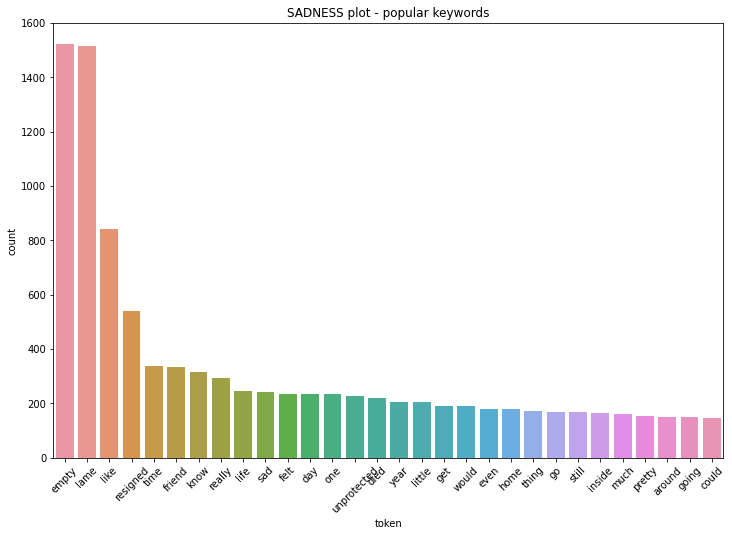

In [ ]:
plot_most_common_words(keyword_sad, "SADNESS")

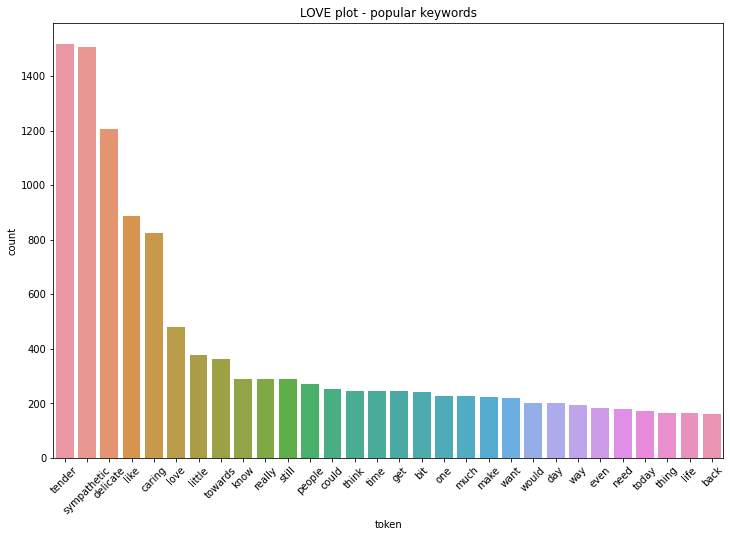

In [ ]:
plot_most_common_words(keyword_love, "LOVE")

In [ ]:
## WordCloud
## Reference: https://amueller.github.io/word_cloud/auto_examples/masked.html
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
csfont = {'fontname':'Comic Sans MS'}

def plot_worldcloud(docx, title):
    face = np.array(Image.open("img/face.png"))
    mywordcloud = WordCloud(background_color="white", max_font_size=50,
                            max_words= 2000, collocations=False, mask=face,).generate(docx)
    image_colors = ImageColorGenerator(face)
    plt.figure(figsize=(20,12))
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.title(f"{title} - cloud", fontsize=25, **csfont)
    plt.axis('off')
    plt.show()

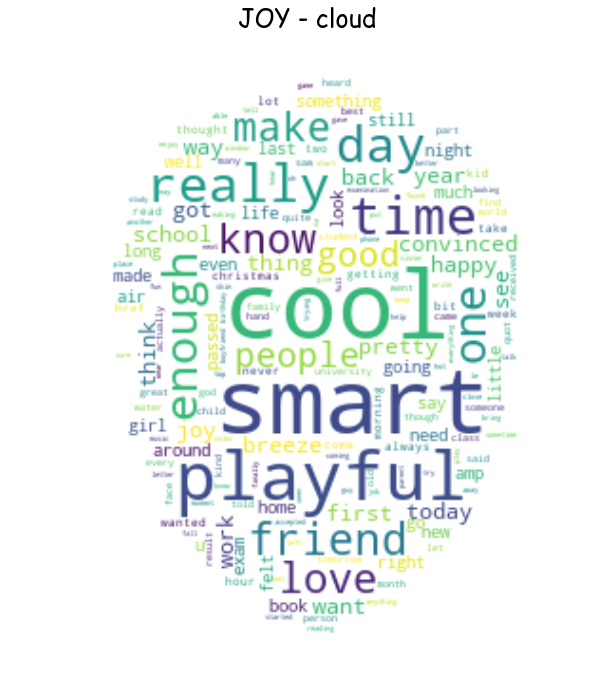

In [ ]:
plot_worldcloud(joy_docx, 'JOY')

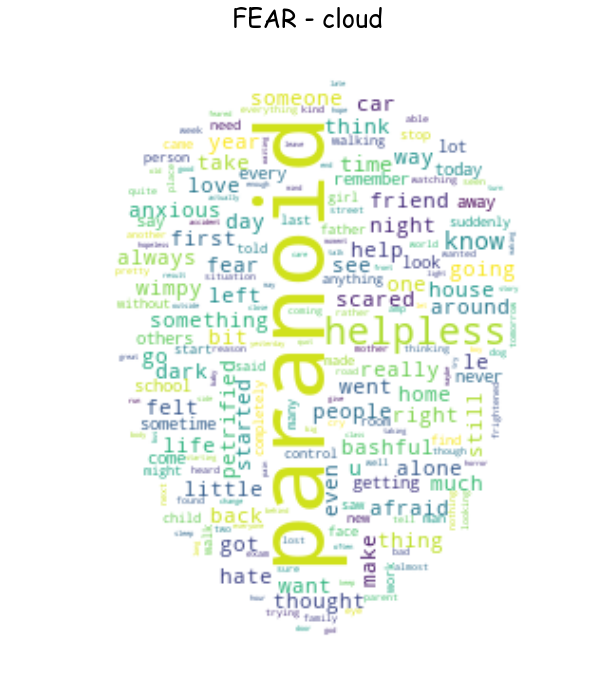

In [ ]:
plot_worldcloud(fear_docx, 'FEAR')

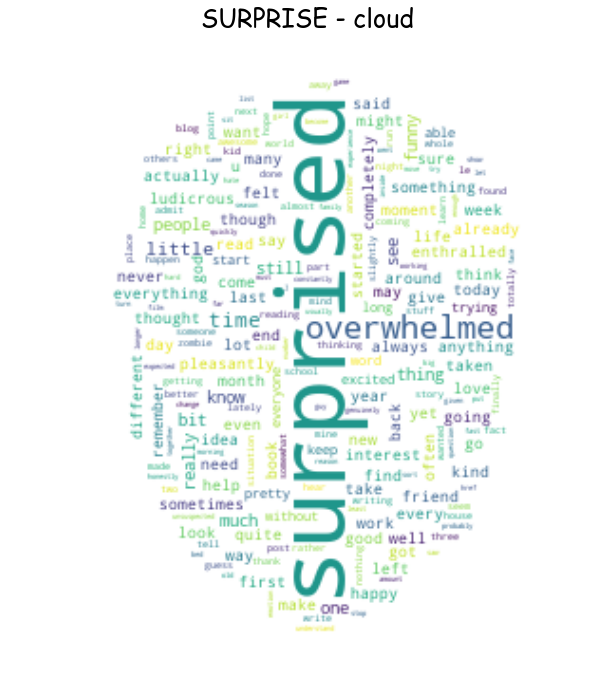

In [ ]:
plot_worldcloud(surprise_docx, 'SURPRISE')

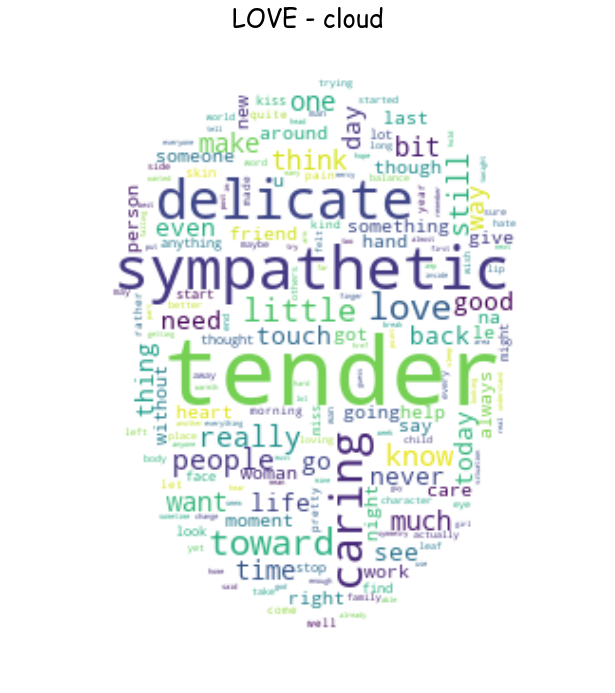

In [ ]:
plot_worldcloud(love_docx, 'LOVE')

The word cloud really depicts good picture of the various emotion

### Sentiment Analysis

Here I am trying to analyse how positive and negative sentiments are associated with the six different human emotions. The sentiment analysis gives a


In [ ]:
from textblob import TextBlob

#Defining a function to label sentiments
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment < 0:
        result = "Negative"
    elif sentiment > 0:
        result = "Positive"
    else:
        result = "Neutral"

    return result

In [ ]:
df['Sentiment'] = df['Clean_Text'].apply(get_sentiment)

In [ ]:
df.groupby(['emotion', 'Sentiment']).size()

emotion   Sentiment
anger     Negative     4189
          Neutral      1259
          Positive      964
fear      Negative     1828
          Neutral      2410
          Positive     1547
joy       Negative      714
          Neutral      1290
          Positive     4461
love      Negative     1642
          Neutral      1060
          Positive     2880
neutral   Negative      547
          Neutral      2250
          Positive     1123
sadness   Negative     3193
          Neutral      1198
          Positive     1328
surprise  Negative      828
          Neutral       751
          Positive     3421
dtype: int64

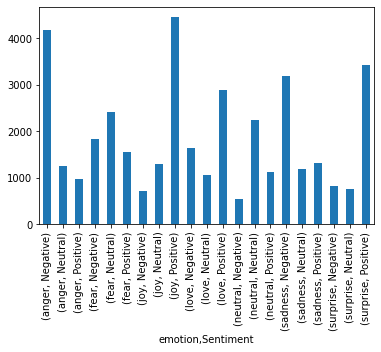

In [ ]:
df.groupby(['emotion', 'Sentiment']).size().plot(kind='bar')
plt.show()

We can better view this overlap of emotion vs sentimens using catplot from seaborn

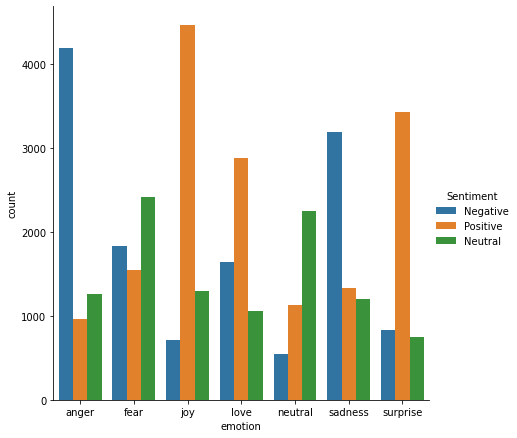

In [ ]:
sns.catplot(x='emotion', hue='Sentiment', kind='count', data=df, height=6)
plt.show()

Here is a Donut chart representation of Sentiment-Emotion distribution


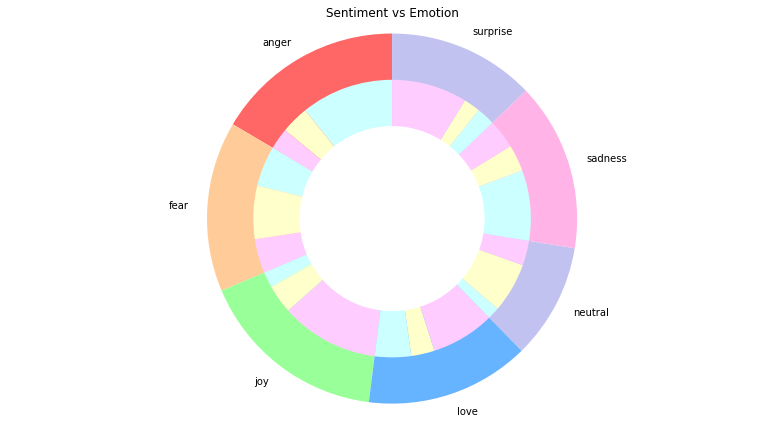

In [ ]:
#define colors
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6', '#c2c2f0']
colors_sentiment = ['#ccffff','#ffffcc','#ffccff', '#ccffff','#ffffcc','#ffccff','#ccffff','#ffffcc','#ffccff','#ccffff','#ffffcc','#ffccff','#ccffff','#ffffcc','#ffccff','#ccffff','#ffffcc','#ffccff','#ccffff','#ffffcc','#ffccff']

#plot_emotion
df['emotion'].value_counts().sort_index(ascending=True).plot.pie(figsize=(11, 6), colors=colors, startangle=90)

#plot_group_by_emotion_then_by_sentiments
df.groupby(['emotion', 'Sentiment']).size().plot.pie(colors=colors_sentiment,radius=0.75,startangle=90, label="", labeldistance=None)

##center circle
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title("Sentiment vs Emotion")
plt.tight_layout()
plt.show()

It is interesting to note with the above 'Emotion-Sentiments' representation that how our emotions have positive and negative sides to it

### Feature Engineering

In the Feature Engineering step, raw text data will be transformed into feature vectors that means, new features will be created using the existing dataset.
+ Implementing below different ideas in order to obtain relevant features from our dataset:
    + CountVectorizer
    + TfidVectorizer
    + HashingVectorizer

And then Comparing the Vectorizer and picking one for the Model Training Step

In [ ]:
#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
#train and test data
from sklearn.model_selection import train_test_split
#Mterics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
X = df['Clean_Text']
y= df['emotion']

In [ ]:
X.shape, y.shape

((38883,), (38883,))

#### CountVectorizer

In [ ]:
#Bag of words Vectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X_cv = cv.fit_transform(X).toarray()

In [ ]:
X_cv.shape

(38883, 5000)

In [ ]:
cv.get_feature_names()[:20]

['abandoned',
 'ability',
 'ability eliminate',
 'able',
 'able get',
 'abroad',
 'absence',
 'absolutely',
 'absolutely disgusted',
 'absolutely petrified',
 'abuse',
 'abused',
 'academic',
 'academy',
 'accept',
 'acceptance',
 'accepted',
 'accepted student',
 'accepting',
 'access']

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
from sklearn.linear_model import LogisticRegression
#train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size=0.2, random_state=42)

#model training
lr_model = LogisticRegression(solver='liblinear',multi_class='auto', max_iter=1000, C=1)
lr_model.fit(X_train_cv, y_train_cv)
print(f"The score is {lr_model.score(X_test_cv, y_test_cv)}")
y_pred_cv=lr_model.predict(X_test_cv)
print()
print("Classfication report")
print(classification_report(y_test_cv, y_pred_cv))

The score is 0.8679439372508679

Classfication report
              precision    recall  f1-score   support

       anger       0.83      0.83      0.83      1306
        fear       0.94      0.85      0.89      1127
         joy       0.85      0.85      0.85      1295
        love       0.98      0.91      0.95      1094
     neutral       0.61      0.83      0.70       779
     sadness       0.91      0.83      0.87      1178
    surprise       0.99      1.00      0.99       998

    accuracy                           0.87      7777
   macro avg       0.87      0.87      0.87      7777
weighted avg       0.88      0.87      0.87      7777



In [ ]:
confusion_matrix(y_test_cv, y_pred_cv)

array([[1078,   27,   52,    4,  105,   38,    2],
       [  54,  954,   36,    2,   66,   14,    1],
       [  50,   16, 1098,    5,  101,   21,    4],
       [   9,    0,   13, 1000,   60,    8,    4],
       [  52,    6,   44,    9,  647,   20,    1],
       [  57,   15,   48,    1,   81,  976,    0],
       [   0,    1,    0,    0,    0,    0,  997]], dtype=int64)

#### TfidVectorizer

In [ ]:
#Defining Tfid Vectorizer
tfid=TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X_tfid = tfid.fit_transform(X).toarray()

In [ ]:
X_tfid.shape

(38883, 5000)

In [ ]:
X_train_tfid, X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(X_tfid, y, test_size=0.2, random_state=42)
lr_model_tfid = LogisticRegression(solver='liblinear',multi_class='auto', max_iter=1000, C=1)
lr_model_tfid.fit(X_train_tfid, y_train_tfid)
print(f"The score is {lr_model_tfid.score(X_test_tfid, y_test_tfid)}")
y_pred_tfid=lr_model_tfid.predict(X_test_tfid)
print()
print("Classfication report")
print(classification_report(y_test_tfid, y_pred_tfid))

The score is 0.8634434872058634

Classfication report
              precision    recall  f1-score   support

       anger       0.79      0.85      0.82      1306
        fear       0.92      0.84      0.88      1127
         joy       0.83      0.84      0.84      1295
        love       0.98      0.91      0.94      1094
     neutral       0.62      0.79      0.70       779
     sadness       0.94      0.81      0.87      1178
    surprise       0.99      1.00      0.99       998

    accuracy                           0.86      7777
   macro avg       0.87      0.86      0.86      7777
weighted avg       0.87      0.86      0.87      7777



In [ ]:
confusion_matrix(y_test_tfid, y_pred_tfid)

array([[1116,   26,   53,    5,   82,   24,    0],
       [  70,  947,   37,    1,   63,    8,    1],
       [  65,   20, 1094,    4,   95,   14,    3],
       [  13,    1,   12,  993,   68,    3,    4],
       [  63,   14,   63,    9,  618,   11,    1],
       [  79,   16,   60,    2,   69,  952,    0],
       [   0,    1,    0,    0,    2,    0,  995]], dtype=int64)

#### HashingVectorizer

In [ ]:
#Defining Hashing Vectorizer
hv=HashingVectorizer(n_features=5000, ngram_range=(1,3))
X_hv = hv.fit_transform(X).toarray()
X_hv.shape

(38883, 5000)

In [ ]:
X_train_hv, X_test_hv, y_train_hv, y_test_hv = train_test_split(X_hv, y, test_size=0.2, random_state=42)
lr_model_hv = LogisticRegression(solver='liblinear',multi_class='auto', max_iter=1000, C=1)
lr_model_hv.fit(X_train_hv, y_train_hv)
print(f"The score is {lr_model_hv.score(X_test_hv, y_test_hv)}")
y_pred_hv=lr_model_hv.predict(X_test_hv)
print()
print("Classfication report")
print(classification_report(y_test_hv, y_pred_hv))

The score is 0.8175388967468176

Classfication report
              precision    recall  f1-score   support

       anger       0.72      0.79      0.75      1306
        fear       0.88      0.79      0.83      1127
         joy       0.78      0.80      0.79      1295
        love       0.97      0.89      0.93      1094
     neutral       0.54      0.68      0.60       779
     sadness       0.91      0.78      0.84      1178
    surprise       0.97      0.98      0.97       998

    accuracy                           0.82      7777
   macro avg       0.82      0.82      0.82      7777
weighted avg       0.83      0.82      0.82      7777



In [ ]:
confusion_matrix(y_test_hv, y_pred_hv)

array([[1031,   32,   80,    8,  125,   27,    3],
       [  81,  888,   58,    3,   72,   21,    4],
       [  95,   24, 1041,    5,  103,   19,    8],
       [  18,    5,   23,  971,   60,   10,    7],
       [ 112,   28,   78,    7,  533,   17,    4],
       [  97,   25,   48,    1,   86,  919,    2],
       [   4,    6,    5,    1,    7,    0,  975]], dtype=int64)

#### Compare: CountVectorizer vs TfidVectorizer vs HashingVectorizer
Compared based on a Logistic Model training score and confusion Matrix

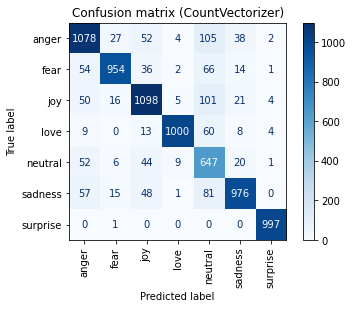

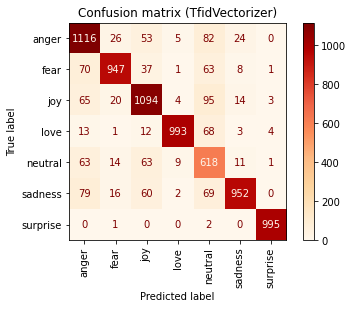

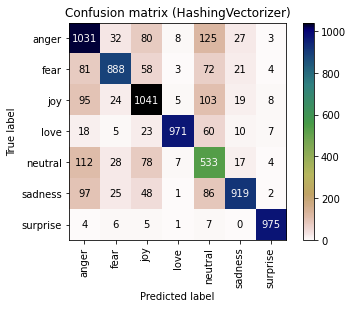

In [ ]:
###Plotting COnfusion matrix(CountVectorizer vs TfidVectorizer)

plot_confusion_matrix(lr_model, X_test_cv, y_test_cv, cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion matrix (CountVectorizer)')
plt.show()

plot_confusion_matrix(lr_model_tfid, X_test_tfid, y_test_tfid, cmap="OrRd")
plt.xticks(rotation=90)
plt.title('Confusion matrix (TfidVectorizer)')
plt.show()

plot_confusion_matrix(lr_model_hv, X_test_hv, y_test_hv, cmap="gist_earth_r")
plt.xticks(rotation=90)
plt.title('Confusion matrix (HashingVectorizer)')
plt.show()

From the above results 'CountVectorizer' seems to give the best results

### Classical Machine Learning Model Training
    
+ Comparing classical Machine learning Algorithms using GridCVSearch and determining the best model
    - Logistic Regression
    - Naive Bayes
    - Random Forest
    - Passive Aggressive Classifier
    - K-nearest Neighbour
    - Support Vector Classifier
    
    * I wanted to compare XGboost Classifier but I wasn't able to run it due to memory insufficiency


#### Using GridSearchCV
Have used GridSearchCV function which does a 5 fold cross validation on the training data to select the best parameters. I have tried to define the some appropriate parameter values based on trial and errors and parameters for some models are set based on the research on text classification(kaggle, medium, machinelearningmastery.com etc

In [ ]:
# #import GridSearchCV
# from sklearn.model_selection import GridSearchCV


# #create Params grid
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.linear_model import PassiveAggressiveClassifier
# from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [ ]:
# #Defining here params grid consisting of 5 Models and their Hyperparameter list

# model_params={
#     'Support_Vector_Classifier':{
#         'model':svm.SVC(gamma='auto'),
#         'params':{
#             'C':[1,10,20],
#             'kernel':['rbf','linear']
#         }
#     },
#     'Random_Forest':{
#         'model':RandomForestClassifier(),
#         'params':{
#             'n_estimators':[1,5,10]
#         }
#     },
#     'Logistic_Regression' :{
#         'model': LogisticRegression(solver='liblinear',multi_class='auto', max_iter=1000),
#         'params':{
#             'C':[1,5,10]
#         }
#     },
#     'Naive_Bayes' :{
#         'model': MultinomialNB(),
#         'params':{b
#             'alpha': [0.01, 0.1, 0.5, ]
#         }
#     },
#     'PassiveAggressiveClassifier':{
#         'model': PassiveAggressiveClassifier(),
#         'params':{
#             'C' : [0.01, 0.03, 0.1],
#             'n_iter': [5, 10, 30]
#         }
#     }

# }

In [ ]:
# ##Initialize a list to Store Model name, best score and best parameters
# scores= []
# # Import Models & their parameters from the dictionary

# for model_name, val in model_params.items():
#     clf=GridSearchCV(val['model'], val['params'], cv=5, return_train_score=False)
#     clf.fit(X_cv, y)
#     scores.append({
#         'model':model_name,
#         'best_score':clf.best_score_,
#         'best_params':clf.best_params_
#     })

# # Make a Dataframe of the scores list with proper columns names
# result=pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
# result

#### As above GridSearchCV did not work me because of memory insufficiency I went ahead with individual model training and compared the scores

#### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

#model training
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_cv, y_train_cv)
lr_model_score=lr_model.score(X_test_cv, y_test_cv)
print(f"The score is {lr_model_score}")
y_pred_lr=lr_model.predict(X_test_cv)
print()
print("Classfication report")
print(metrics.classification_report(y_test_cv, y_pred_lr))
scoreboard=pd.DataFrame(columns=['Model', 'Score'])
scoreboard=scoreboard.append({'Model': 'LogisticRegression', 'Score':lr_model_score}, ignore_index=True)
scoreboard

The score is 0.8678153529638678

Classfication report
              precision    recall  f1-score   support

       anger       0.83      0.82      0.83      1306
        fear       0.92      0.85      0.88      1127
         joy       0.85      0.84      0.85      1295
        love       0.97      0.92      0.94      1094
     neutral       0.62      0.82      0.71       779
     sadness       0.90      0.83      0.87      1178
    surprise       0.99      1.00      1.00       998

    accuracy                           0.87      7777
   macro avg       0.87      0.87      0.87      7777
weighted avg       0.88      0.87      0.87      7777



,Model,Score
0,LogisticRegression,0.867815


#### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#model training
nb_model = MultinomialNB()
nb_model.fit(X_train_cv, y_train_cv)
nb_model_score=nb_model.score(X_test_cv, y_test_cv)
print(f"The score is {nb_model_score}")
y_pred_nb=nb_model.predict(X_test_cv)
print()
print("Classfication report")
print(metrics.classification_report(y_test_cv, y_pred_nb))
scoreboard=scoreboard.append({'Model': 'NaiveBayes', 'Score':nb_model_score}, ignore_index=True)
scoreboard

The score is 0.8207535039218208

Classfication report
              precision    recall  f1-score   support

       anger       0.76      0.83      0.80      1306
        fear       0.85      0.83      0.84      1127
         joy       0.81      0.81      0.81      1295
        love       0.91      0.89      0.90      1094
     neutral       0.56      0.55      0.56       779
     sadness       0.88      0.80      0.84      1178
    surprise       0.92      0.97      0.95       998

    accuracy                           0.82      7777
   macro avg       0.81      0.81      0.81      7777
weighted avg       0.82      0.82      0.82      7777



,Model,Score
0,LogisticRegression,0.867815
1,NaiveBayes,0.820754


#### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# #model training
rf_model = RandomForestClassifier()
rf_model.fit(X_train_cv, y_train_cv)
rf_model_score=rf_model.score(X_test_cv, y_test_cv)
print(f"The score is {rf_model_score}")
y_pred_rf=rf_model.predict(X_test_cv)
print()
print("Classfication report")
print(metrics.classification_report(y_test_cv, y_pred_rf))
scoreboard=scoreboard.append({'Model': 'RandomForest', 'Score':rf_model_score}, ignore_index=True)
scoreboard

The score is 0.8568856885688569

Classfication report
              precision    recall  f1-score   support

       anger       0.81      0.80      0.81      1306
        fear       0.95      0.84      0.89      1127
         joy       0.88      0.82      0.85      1295
        love       0.97      0.91      0.94      1094
     neutral       0.56      0.83      0.67       779
     sadness       0.89      0.82      0.85      1178
    surprise       0.99      0.99      0.99       998

    accuracy                           0.86      7777
   macro avg       0.86      0.86      0.86      7777
weighted avg       0.87      0.86      0.86      7777



,Model,Score
0,LogisticRegression,0.867815
1,NaiveBayes,0.820754
2,RandomForest,0.856886


#### PASSIVE AGRESSIVE CLASSIFIER

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
##model training
pac_model = RandomForestClassifier()
pac_model.fit(X_train_cv, y_train_cv)
pac_model_score=pac_model.score(X_test_cv, y_test_cv)
print(f"The score is {pac_model_score}")
y_pred_pac=pac_model.predict(X_test_cv)
print()
print("Classfication report")
print(metrics.classification_report(y_test_cv, y_pred_pac))
scoreboard=scoreboard.append({'Model': 'PassiveAgressiveClassifier', 'Score':pac_model_score}, ignore_index=True)
scoreboard

The score is 0.8607432171788607

Classfication report
              precision    recall  f1-score   support

       anger       0.83      0.81      0.82      1306
        fear       0.94      0.84      0.89      1127
         joy       0.89      0.83      0.86      1295
        love       0.96      0.91      0.94      1094
     neutral       0.56      0.84      0.67       779
     sadness       0.89      0.82      0.85      1178
    surprise       0.99      1.00      1.00       998

    accuracy                           0.86      7777
   macro avg       0.87      0.86      0.86      7777
weighted avg       0.88      0.86      0.87      7777



,Model,Score
0,LogisticRegression,0.867815
1,NaiveBayes,0.820754
2,RandomForest,0.856886
3,PassiveAgressiveClassifier,0.860743


#### K-NEAREST NEIGHBOUR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# #model training
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_cv, y_train_cv)
knn_model_score=knn_model.score(X_test_cv, y_test_cv)
print(f"The score is {knn_model_score}")
y_pred_knn=knn_model.predict(X_test_cv)
print()
print("Classfication report")
print(metrics.classification_report(y_test_cv, y_pred_knn))
scoreboard=scoreboard.append({'Model': 'KNeighborsClassifier', 'Score':knn_model_score}, ignore_index=True)
scoreboard

The score is 0.7351163687797351

Classfication report
              precision    recall  f1-score   support

       anger       0.81      0.56      0.66      1306
        fear       0.92      0.70      0.80      1127
         joy       0.91      0.65      0.75      1295
        love       0.96      0.82      0.88      1094
     neutral       0.31      0.95      0.47       779
     sadness       0.92      0.70      0.79      1178
    surprise       0.99      0.90      0.94       998

    accuracy                           0.74      7777
   macro avg       0.83      0.75      0.76      7777
weighted avg       0.85      0.74      0.77      7777



,Model,Score
0,LogisticRegression,0.867815
1,NaiveBayes,0.820754
2,RandomForest,0.856886
3,PassiveAgressiveClassifier,0.860743
4,KNeighborsClassifier,0.735116


#### SUPPORT VECTOR CLASSIFIER

In [ ]:
from sklearn.svm import LinearSVC

# #model training
sv_model = LinearSVC()
sv_model.fit(X_train_cv, y_train_cv)
sv_model_score=sv_model.score(X_test_cv, y_test_cv)
print(f"The score is {sv_model_score}")
y_pred_sv=sv_model.predict(X_test_cv)
print()
print("Classfication report")
print(metrics.classification_report(y_test_cv, y_pred_sv))
scoreboard=scoreboard.append({'Model': 'SupportVectorClassifier', 'Score':sv_model_score}, ignore_index=True)
scoreboard

The score is 0.8567571042818568

Classfication report
              precision    recall  f1-score   support

       anger       0.82      0.80      0.81      1306
        fear       0.89      0.86      0.87      1127
         joy       0.84      0.83      0.84      1295
        love       0.95      0.92      0.94      1094
     neutral       0.64      0.77      0.70       779
     sadness       0.86      0.83      0.85      1178
    surprise       0.99      0.99      0.99       998

    accuracy                           0.86      7777
   macro avg       0.86      0.86      0.86      7777
weighted avg       0.86      0.86      0.86      7777



,Model,Score
0,LogisticRegression,0.867815
1,NaiveBayes,0.820754
2,RandomForest,0.856886
3,PassiveAgressiveClassifier,0.860743
4,KNeighborsClassifier,0.735116
5,SupportVectorClassifier,0.856757


#### Sorting the accuracy scoreboard

In [ ]:
scoreboard=scoreboard.sort_values(by=['Score'], ignore_index=True)
scoreboard

,Model,Score
0,KNeighborsClassifier,0.735116
1,NaiveBayes,0.820754
2,SupportVectorClassifier,0.856757
3,RandomForest,0.856886
4,PassiveAgressiveClassifier,0.860743
5,LogisticRegression,0.867815


#### Comparative View of all ML model scores

LogisticRegression Model gave the best score of 86.78

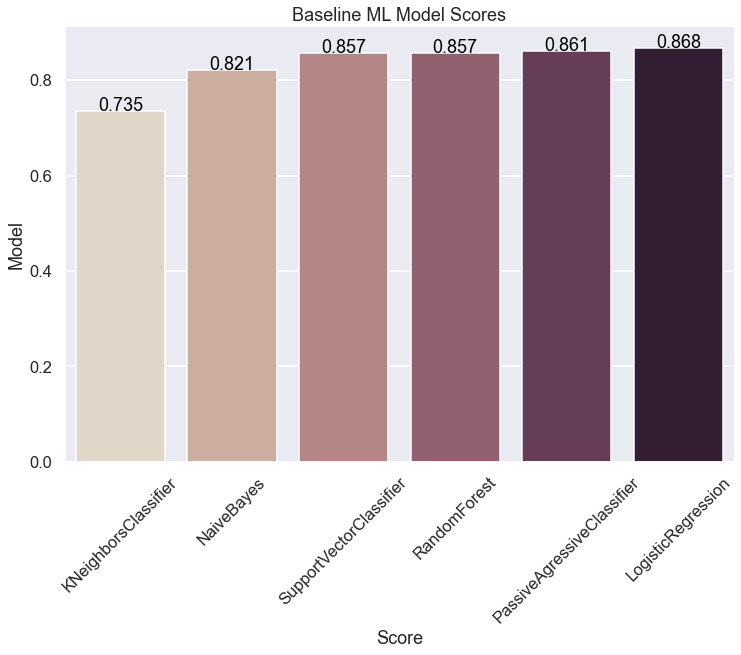

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')
g =sns.barplot(x='Model',y='Score',data=scoreboard, palette="ch:.25")
for index, row in scoreboard.iterrows():
    g.text(row.name, row.Score, round(row.Score,3), color='black', ha="center")

plt.xticks(rotation=45)
plt.title('Baseline ML Model Scores')
plt.ylabel('Model')
plt.xlabel('Score')
sns.despine()

plt.show()


#### Model Interpretation
 + Using Eli5

In [ ]:
import eli5

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [ ]:
#Show the weights for each Class/label
## Code Reference:https://eli5.readthedocs.io/en/latest/tutorials/sklearn-text.html#baseline-model
eli5.show_weights(lr_model, top=20)

In [ ]:
# With feature names displayed
class_names=y.unique().tolist()
feature_names =cv.get_feature_names()
eli5.show_weights(lr_model, feature_names=feature_names, target_names=class_names)

#### Using the best model, making a sample text prediction
+ Vectorize our text
+ Applied our model

In [ ]:
sample_text=['She looks very afraid']

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
lr_model.predict(vect)

array(['fear'], dtype=object)

The above prediction looks good but to mention it did not always give the best prediction

### Basic LSTM Model
Trying here a simple LSTM model to study Emotion analysis using Neural Networks

In [ ]:
# Working here with already text preprocessed dataset,
df.head()

,text,emotion,Clean_Text,Sentiment
0,i feel cold,anger,cold,Negative
1,i feel the cold i can say he sends it,anger,cold say sends,Negative
2,i remember feeling like my blood had run cold ...,anger,remember like blood run cold actually dropped ...,Negative
3,i hate too is stepping outside in the cold and...,anger,hate stepping outside cold cold hug leg crawl ...,Negative
4,i don't think i am anti social i just don't re...,anger,think anti social really like going cold weath...,Negative


#### For LSTM Modeling, steps taken:
+ Vectorizing 'Clean_Text' text
+ Limiting  data set to the top 5000 words.
+ Setting the max number of words in each text at 250.

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 5000
# Max number of words in each text.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Clean_Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22350 unique tokens.


In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['Clean_Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (38883, 250)


Converting categorical labels to numbers

In [ ]:
y = pd.get_dummies(df['emotion']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (38883, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(34994, 250) (34994, 7)
(3889, 250) (3889, 7)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Activation, Embedding
from tensorflow.keras.callbacks import EarlyStopping

First layer is the embedding layer, with 100 length vectors representing each word
SpatialDropout1D performs variational dropout in NLP models
Next layer is  LSTM layer with 100 memory units
Output layer must create 7 output values, one for each class
Have choosen Activation function as softmax for multi-class classification
and Categorical_crossentropy is used as the loss function.

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 7)                 707       
Total params: 581,107
Trainable params: 581,107
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
493/493 [==============================] - 294s 592ms/step - loss: 0.8020 - accuracy: 0.7325 - val_loss: 0.4067 - val_accuracy: 0.8611
Epoch 2/5
493/493 [==============================] - 302s 613ms/step - loss: 0.3356 - accuracy: 0.8912 - val_loss: 0.3896 - val_accuracy: 0.8689
Epoch 3/5
493/493 [==============================] - 302s 614ms/step - loss: 0.2655 - accuracy: 0.9113 - val_loss: 0.4269 - val_accuracy: 0.8597
Epoch 4/5
493/493 [==============================] - 306s 621ms/step - loss: 0.2239 - accuracy: 0.9252 - val_loss: 0.4319 - val_accuracy: 0.8640
Epoch 5/5
493/493 [==============================] - 311s 631ms/step - loss: 0.1961 - accuracy: 0.9365 - val_loss: 0.4743 - val_accuracy: 0.8583


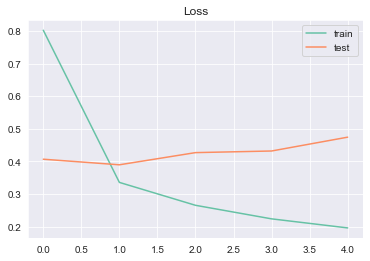

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

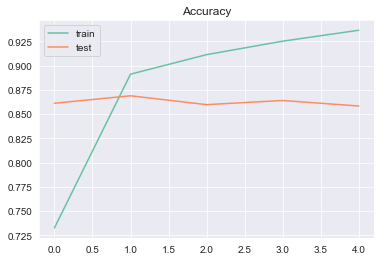

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

The plots suggest that the model has a little over fitting problem, and adding more data may help

### Future Improvements or progress which I would like to make -
 + Trying hyperparameter tuning for classical Machine learning models
 + Neural Network - trying a Conv1d + LSTM model
 + Using a larger dataset
 + Deploying the model with a bare minimum interface to predict some actual data

### References:

Deep Learning Methods for Emotion Detection from Text - Dr. Liron Allerhand
https://www.youtube.com/watch?v=DzAZ2Bq_dgU

Emotion Detection of Text Using Machine Learning and Python- https://www.youtube.com/watch?v=t1TkAcSDsI8

https://github.com/maelfabien/Multimodal-Emotion-Recognition/blob/master/README.md#a-text-processing

Theory: https://www.baeldung.com/cs/ml-emotion-detection

DL method - Presentation
https://www.youtube.com/watch?v=t8KH4HA-zGU
Text-based Emotion Recognition

Classic NLP
https://www.youtube.com/watch?v=Sg8NjU_WRX8
Emotion Detection From Text | MACHINE LEARNING CLASSFICATION | NLP

https://www.youtube.com/watch?v=0kPRaYSgblM
Naive Bayes algorithm in Machine learning Program | Text Classification python (2018)


https://www.kaggle.com/arunrk7/nlp-beginner-text-classification-using-lstm

Multiclass Text Classification using Keras Tensorflow https://www.youtube.com/watch?v=7MQ_SXlOXaE


### Thank you!